# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [35]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

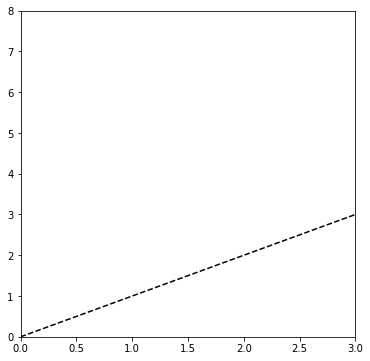

In [36]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

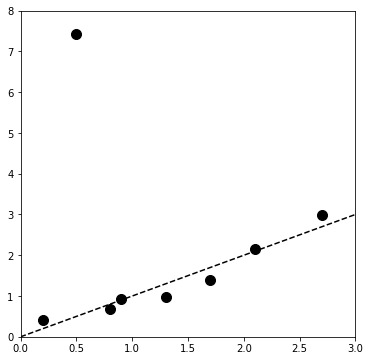

In [38]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+7
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [39]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[-0.04665033]
2.18005529301


Definiujemy naszą funkcję regresji

In [40]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

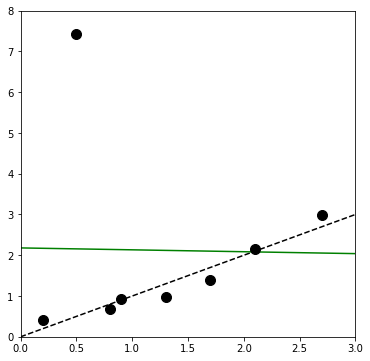

In [41]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [42]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

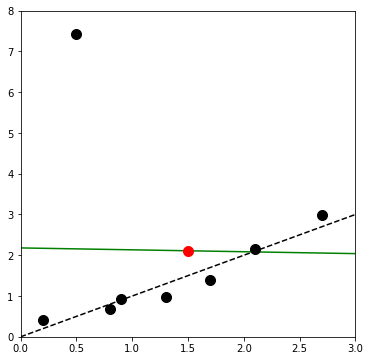

In [43]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [44]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.000292962669911
-3411.40417297


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy.  

In [45]:
deg=1
xx=np.vander(x, deg + 1)
xx

array([[ 0.2,  1. ],
       [ 0.5,  1. ],
       [ 0.8,  1. ],
       [ 0.9,  1. ],
       [ 1.3,  1. ],
       [ 1.7,  1. ],
       [ 2.1,  1. ],
       [ 2.7,  1. ]])

In [46]:
w = np.linalg.solve(np.dot(xx.T, xx), np.dot(xx.T, y))
print(w)
print(lr.coef_)
print(lr.intercept_)

[-0.04665033  2.18005529]
[-0.04665033]
2.18005529301


# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [47]:
from scipy import optimize
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

         Current function value: 0.000100
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 2
[ -1.01000000e+00  -7.52508635e-09]


# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [48]:
points = np.column_stack((x,y))
def compute_error(x):
    b, a = x
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (a * x + b)) ** 2
    return totalError / float(len(points))

In [49]:
print(compute_error((1,1)))
print(compute_error((1,0)))
print(compute_error((lr.intercept_,lr.coef_)))

5.36590709822
5.9123883774
[ 4.65533328]


# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [50]:
x0 = np.asarray((1, 1))
min_value = optimize.fmin_cg(compute_error, x0)
print(min_value)

Optimization terminated successfully.
         Current function value: 4.655333
         Iterations: 2
         Function evaluations: 20
         Gradient evaluations: 5
[ 2.18005703 -0.04665134]


In [51]:
print(lr.coef_)
print(lr.intercept_)

[-0.04665033]
2.18005529301


In [52]:
f_lr_min = lambda x: min_value[1] * x +min_value[0]

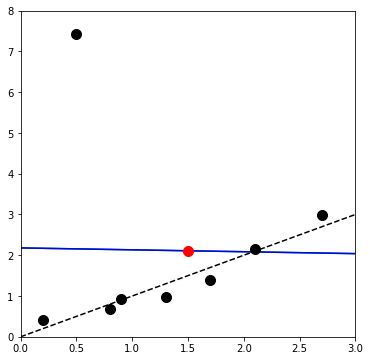

In [53]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x_tr, f_lr_min(x_tr), 'b');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [54]:
points = np.column_stack((x,y))
def compute_error_1(x):
    b, a = x
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += np.abs(y - (a * x + b))
    return totalError / float(len(points))

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [55]:
x0 = np.asarray((1, 1))
min_value = optimize.fmin_cg(compute_error_1, x0)
print(min_value)

         Current function value: 1.044715
         Iterations: 3
         Function evaluations: 287
         Gradient evaluations: 71
[ 0.18410245  0.84238916]


In [56]:
f_lr_1 = lambda x: min_value[1] * x +min_value[0]

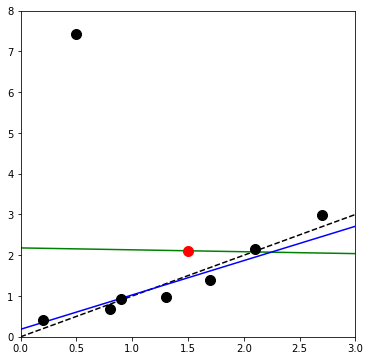

In [57]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x_tr, f_lr_1(x_tr), 'b');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

In [31]:
def f(a,b):
    suma = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        suma += (y - (a * x + b)) ** 2
    return suma / float(len(points))

In [32]:
f(a=1,b=3)

4.6854572922979179